In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Este proyecto busca mirar la duración de las películas que ofrece Netflix en su plataforma e identificar si la la duración de estas ha aumentado o disminuido.

Para ello nos dan una base de datos y unos datos previos. Los datos previos nos indican que entre los años 2011 y 2020 la duración en promedio de las películas ha sido 103, 101, 99, 100, 100, 95, 95, 96, 93, y 90, respectivamente. 

Iniciaremos haciendo el análisis con los datos recién proporcionados y luego continuaremos con la base de datos.

In [2]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years": years, "durations": durations}

# Print the dictionary
print("Se crea un diccionario con la información de los años y duración promedio de las películas\n\n",movie_dict)

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print("\n\nSe convierte el diccionario en un data frame\n")
durations_df

Se crea un diccionario con la información de los años y duración promedio de las películas

 {'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


Se convierte el diccionario en un data frame



,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


Ya que hemos puesto los datos en un dataframe, visualicemoslos en un gráfico

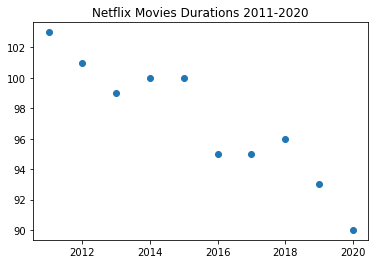

In [3]:
# Create a figure
fig = plt.figure()

# Draw a line plot of release_year and durations
plt.scatter(durations_df.years,durations_df.durations) # Line plot es plt.plot(), pero estéticamente se ve mejor 
                                                       # con scatter.
# Create a title
plt.title("Netflix Movies Durations 2011-2020")
#Show the plot
plt.show()

En el momento de hacer análisis de datos, esta información no es suficiente, se necesitan más datos porque, en primer lugar, los datos anteriores son un promedio de duración y en segundo lugar existen varios factores que pueden influenciar su duración, por eso necestamos información de el país, título, género, incluso con cuánto presupuesto contaban, año de lanzamiento.

Con esto en mente veamos el dataframe que nos dieron y analicemos datos.

In [4]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

#Print the first rows of the DataFrame
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas


El subgrupo "type" del DF nos indica el tipo de producción, si es un show de TV, una película. Para verificar que solo existen esos dos valores en el tipo de producción  contamos los valores.

In [5]:
netflix_df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Pero como solo nos interesan las peliculas, vamos a extraer en otro DF la información necesaria.

In [6]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title","country","genre","release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


Reproduzcamos la misma gráfica con esta información y más adelante veamos las diferencias entre géneros.

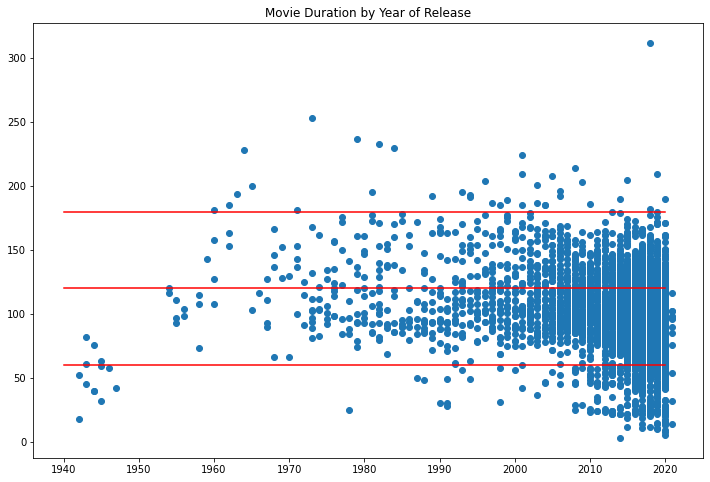

In [7]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"])
plt.plot([1940,2020],[60,60], color = 'r')          # 1 hora
plt.plot([1940,2020],[120,120], color = 'r')        # 2 horas
plt.plot([1940,2020],[180,180], color = 'r')        # 3 horas
# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

Podemos ver que hay pocas peliculas que duran más de 3h y menos de 1h. Veamos cómo se comportan las peliculas menores a 60 minutos

In [8]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"]<60]
print(short_movies.shape)
# Print the first 20 rows of short_movies
short_movies.head(2)

(420, 5)


,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44


Ahora hagamos la misma gráfica discrimindando por el género

In [9]:
netflix_df_movies_only.genre.value_counts()

Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: genre, dtype: int64

In [10]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if  row["genre"] == "Children" :
        colors.append("lightcoral")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    elif row["genre"] == "Dramas":
        colors.append("orange")
    elif row["genre"] == "Action" :
        colors.append("tomato")
    elif row["genre"] == "Horror Movies":
        colors.append("darkred")
    elif row["genre"] == "International Movies":
        colors.append("magenta")
    else:
        colors.append("black")

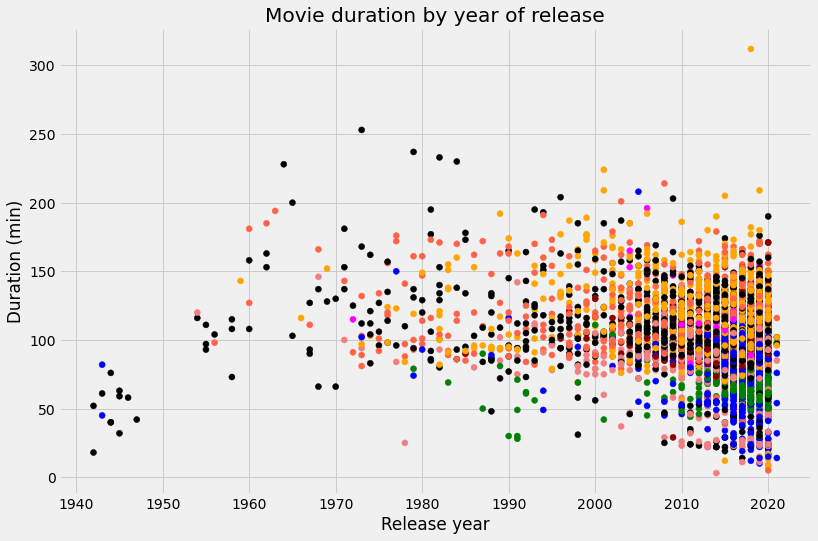

In [11]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"], c= colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

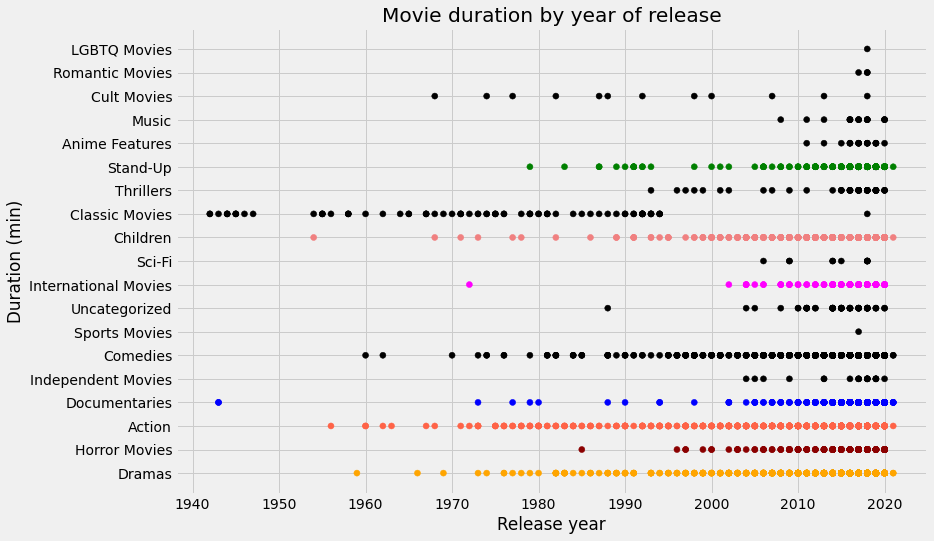

In [12]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of genre versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["genre"], c= colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

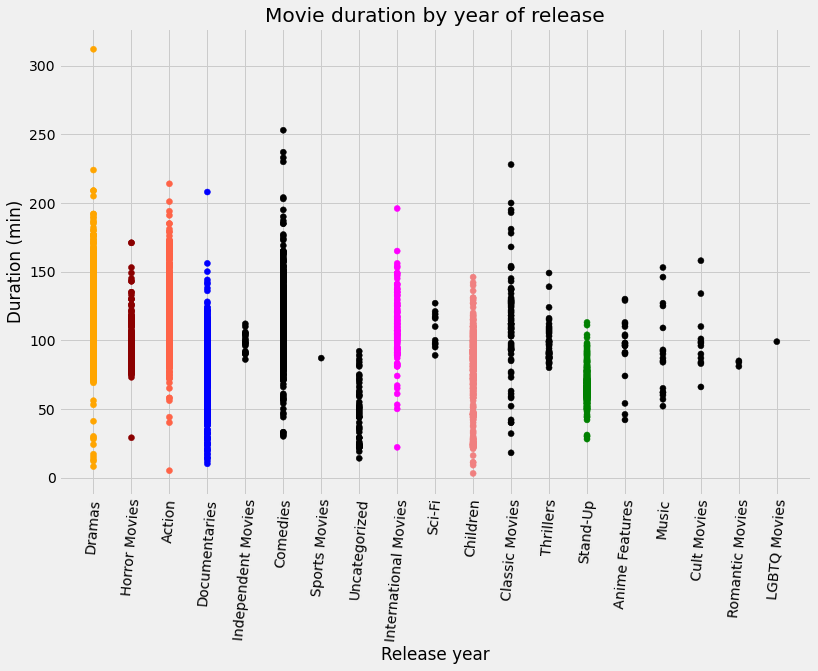

In [13]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus genre
plt.scatter(netflix_movies_col_subset["genre"],netflix_movies_col_subset["duration"], c= colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.xticks(rotation = 85)
# Show the plot
plt.show()

De estas gráficas pueden sacarse varias conclusiones. Se dejan al lector.